In [64]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

In [87]:
file_field = "xray_native_0+xray_native_1"
field = "rmsd"

volume_df = pd.read_csv("../../data/analysis/267_full_ref/volume_{}.csv".format(file_field), index_col=0)
print(len(volume_df))
volume_df.head()

1000


,n,xray_native_0+xray_native_1_mean,xray_native_0+xray_native_1_std,ff_mean,ff_std,rmsd_mean,rmsd_std,xray_native_0+xray_native_1_50,xray_native_0+xray_native_1_25,xray_native_0+xray_native_1_75,ff_50,ff_25,ff_75,rmsd_50,rmsd_25,rmsd_75
0,1,8.633476,0.339484,5080.978742,2548.647842,0.314264,0.401545,8.722652,8.422136,8.894870,4341.067461,3306.494954,6212.563473,0.152711,0.111093,0.269984
1,2,8.459903,0.320386,5305.687521,2672.486629,0.169399,0.210718,8.508204,8.212953,8.724869,4580.300549,3409.759243,6382.467094,0.123740,0.095362,0.165324
2,3,8.344118,0.307560,5836.053753,3010.333990,0.130604,0.112996,8.360031,8.093926,8.594206,5173.690717,3669.563519,6946.634229,0.113382,0.086483,0.147739
3,4,8.270398,0.295079,6302.797851,3189.284667,0.118966,0.071634,8.280667,8.029067,8.497439,5610.492056,4013.084505,7632.266475,0.110660,0.082254,0.140613
4,5,8.211571,0.280477,6653.684827,3347.577644,0.110046,0.048804,8.191922,7.987519,8.426242,5918.536739,4228.145013,7816.578489,0.103500,0.076564,0.131909


In [88]:
natives_df = pd.read_csv("../../../dev/45_synthetic_native_4/data/csvs/natives.csv", index_col=0)
natives_df["xray_native_0+xray_native_1"] = natives_df["xray_native_0"] + natives_df["xray_native_1"]
natives_df["rmsd"] = natives_df["rmsd_native_0"] + natives_df["rmsd_native_1"]
natives_df.head()

,pdb,cif_0,cif_1,w_0_0,w_0_1,w_1_0,w_1_1,xray_0,r_free_0,r_work_0,...,xray_native_0,r_free_native_0,r_work_native_0,rmsd_native_0,xray_native_1,r_free_native_1,r_work_native_1,rmsd_native_1,xray_native_0+xray_native_1,rmsd
0,/Users/matthew/Documents/xray/dev/45_synthetic...,/Users/matthew/Documents/xray/dev/45_synthetic...,/Users/matthew/Documents/xray/dev/45_synthetic...,0.9,0.1,0.1,0.9,1.246879,0.015709,0.009195,...,1.246879,0.015709,0.009195,0.0,0.814869,0.015732,0.00829,0.0,2.061748,0.0


In [89]:
err

[0      3.914162e-01
 1      1.480685e-01
 2      5.426628e-02
 3      4.203425e-02
 4      3.128448e-02
            ...     
 995    1.680131e-05
 996    1.503510e-05
 997    1.302732e-05
 998    7.528864e-06
 999    1.387779e-17
 Name: rmsd_std, Length: 1000, dtype: float64,
 0      3.914162e-01
 1      1.480685e-01
 2      5.426628e-02
 3      4.203425e-02
 4      3.128448e-02
            ...     
 995    1.680131e-05
 996    1.503510e-05
 997    1.302732e-05
 998    7.528864e-06
 999    1.387779e-17
 Name: rmsd_std, Length: 1000, dtype: float64]

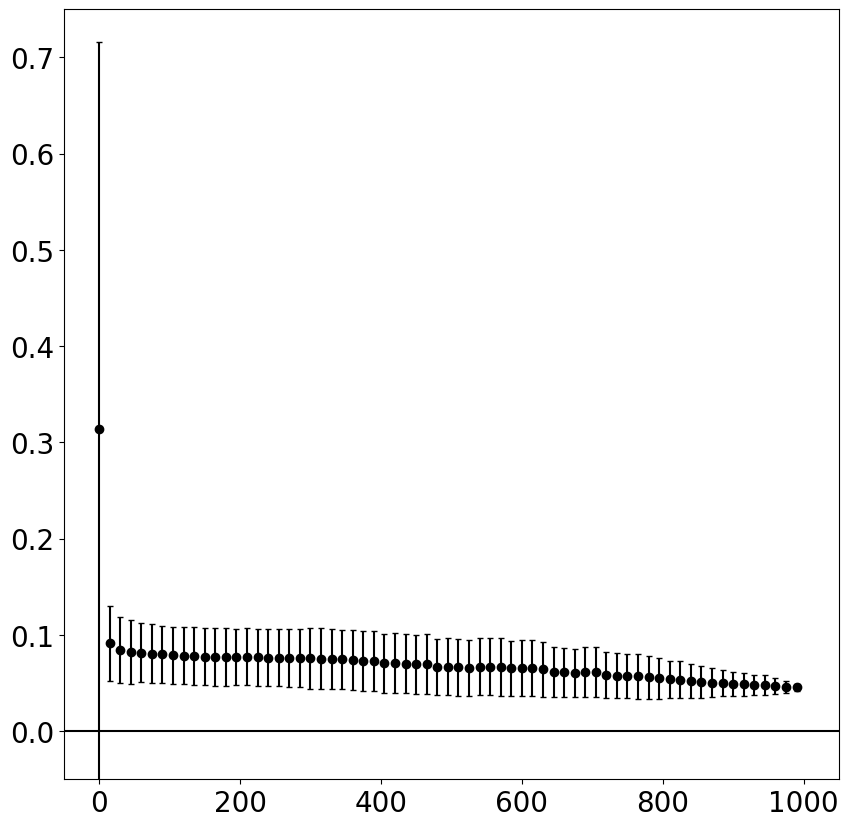

In [ ]:
plt.figure(figsize=(10,10))

x = list(range(len(volume_df)))
y = volume_df["{}_mean".format(field)]

# err = [y - volume_df["{}_25".format(field)], volume_df["{}_75".format(field)] - y]
err = [volume_df["{}_std".format(field)], volume_df["{}_std".format(field)]]

space = 15
plt.errorbar(x[::space], y[::space], [err[0][::space], err[1][::space]], linestyle='None', marker='o', capsize=2, c="black")

plt.plot([-1000, 2000], [natives_df[field], natives_df[field]], c="black")
plt.xlim(-50,1050)

if field == "rmsd":
    plt.ylim(-0.05, 0.75)

plt.tick_params(axis='both', which='major', labelsize=20)  # Adjust the size as needed

plt.xlabel(None)
plt.ylabel(None)

plt.savefig(Path(Path.home(), "Downloads/volume.png"))